In [1]:
import pickle
import numpy as np
import pysal as ps
from scipy import sparse

from datetime import date
from datetime import timedelta

import pandas as pd
from pandas import TimeGrouper

import matplotlib.pyplot as plt

c:\users\chuan\appdata\local\programs\python\python35\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [2]:
def printGrids(periodsAhead):
    %matplotlib inline
    colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4' ,'#46f0f0','#f032e6','#d2f53c','#008080','#e6beff','#aa6e28','#800000','#aaffc3','#808000','#fabebe','#ffd8b1','#000080','#808080','#000000']
    plt.close('all')
    fig, ax = plt.subplots(1, 3, figsize=(18,5), sharey=True)
    i = 0
    for result in results_mm_grid:
        ax[0].set_ylabel('fractions of crimes avoided')
        ax[0].plot(result, color=colors[i], alpha = 0.85)
        ax[0].legend()
        i += 1
    i = 0
    for result in results_ar_grid:
        ax[1].set_xlabel('Available resources')
        ax[1].set_title('{} week(s) ahead grid results'.format(periodsAhead))
        ax[1].plot(result, color=colors[i], alpha = 0.85)
        ax[1].legend()
        i += 1
    i = 0
    for result in results_h_grid:
        ax[2].plot(result, color=colors[i], alpha = 0.85)
        ax[2].legend()
        i+= 1
    midpoint = i
    for result in results_mm_grid_1:
        print(result)
        ax[0].set_ylabel('fractions of crimes avoided')
        ax[0].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[0].legend()
        i += 1
    i = midpoint
    for result in results_ar_grid_1:
        ax[1].set_xlabel('Available resources')
        ax[1].set_title('{} week(s) ahead grid results'.format(periodsAhead))
        ax[1].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[1].legend()
        i += 1
    i = midpoint
    for result in results_h_grid_1:
        ax[2].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[2].legend()
        i += 1
    plt.savefig('results/grid/{}week_grids.svg'.format(periodsAhead))
    plt.savefig('results/grid/{}week_grids.png'.format(periodsAhead), dpi=300)

In [3]:
periodsAhead = 1

25    0.331151
35    0.415282
45    0.477471
55    0.535044
60    0.567844
65    0.603196
70    0.633326
75    0.662035
80    0.686767
Name: MA (10), dtype: float64
25    0.331151
35    0.411847
45    0.462093
55    0.518097
60    0.551049
65    0.586401
70    0.616531
75    0.645240
80    0.669972
Name: MA (20), dtype: float64
25    0.331151
35    0.411935
45    0.453826
55    0.501803
60    0.529677
65    0.562298
70    0.598766
75    0.628470
80    0.656524
Name: MA (30), dtype: float64
25    0.332820
35    0.407886
45    0.453518
55    0.497589
60    0.525600
65    0.560386
70    0.596333
75    0.625394
80    0.652995
Name: MA (40), dtype: float64
25    0.334161
35    0.414467
45    0.464188
55    0.510958
60    0.541309
65    0.575434
70    0.609771
75    0.639084
80    0.666663
Name: MA (50), dtype: float64
25    0.334161
35    0.412452
45    0.446252
55    0.476312
60    0.500116
65    0.530070
70    0.561867
75    0.597300
80    0.628761
Name: MA (60), dtype: float64
25    0.34

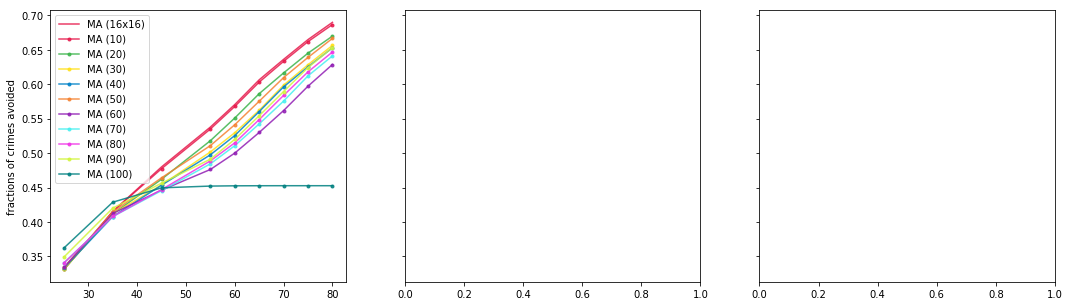

In [4]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1 = pickle.load(pkl_file_1)
printGrids(periodsAhead)

In [6]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1 = pickle.load(pkl_file_1)
print(count_mm_cluster)
printGrids(periodsAhead)

NameError: name 'count_mm_cluster' is not defined

In [ ]:
periodsAhead = 16

In [ ]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1 = pickle.load(pkl_file_1)
printGrids(periodsAhead)